## Numerical analysis of Cantilever: ChatGPT edition

### Author: Anupsa Swain, using ChatGPT

#### _Prompt #1: write a python code for constructing a cantilever bar under weight at the end_

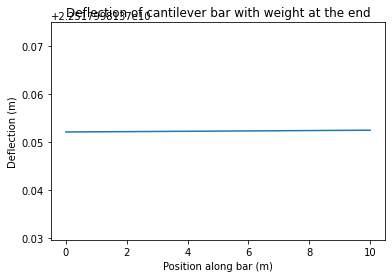

In [1]:
# code generated:

import matplotlib.pyplot as plt
import numpy as np

# Define bar properties
L = 10.0  # Length of bar in meters
A = 0.1  # Cross-sectional area in square meters
E = 2e11  # Young's modulus in Pascals

# Define weight and position
W = 1000.0  # Weight in Newtons
x_w = L  # Position of weight in meters

# Define number of elements
n = 100

# Define element length
dx = L / n

# Define element stiffness
k = E * A / dx

# Initialize arrays
u = np.zeros(n+1)
f = np.zeros(n+1)

# Set boundary condition
u[0] = 0.0

# Apply load at the end of the bar
f[-1] = W

# Construct stiffness matrix and load vector
K = np.zeros((n+1, n+1))
F = np.zeros(n+1)

for i in range(n):
    K[i,i] += k
    K[i+1,i+1] += k
    K[i,i+1] += -k
    K[i+1,i] += -k
    F[i] += f[i]
    F[i+1] += f[i+1]

# Solve system of equations
u = np.linalg.solve(K, F)

# Plot deflection
x = np.linspace(0, L, n+1)
plt.plot(x, u*1000)
plt.xlabel('Position along bar (m)')
plt.ylabel('Deflection (m)')
plt.title('Deflection of cantilever bar with weight at the end')
plt.show()


This doesn't do much. So next, I asked ChatGPT to define a cantilever which became fun when it defined a class for it. 

#### _Prompt #2: define a cantilever in python_

**ChatGPT**: In engineering and physics, a cantilever is a structure that is supported at one end and carries a load at the other end. In Python, we can define a cantilever using its properties such as its length, cross-sectional area, and Young's modulus. Here's an example code to define a cantilever in Python:

In [6]:
class Cantilever:
    def __init__(self, length, area, modulus):
        self.length = length  # Length of the cantilever
        self.area = area  # Cross-sectional area of the cantilever
        self.modulus = modulus  # Young's modulus of the cantilever

    def __str__(self):
        return f"Cantilever with length {self.length} m, area {self.area} m^2, and modulus {self.modulus} Pa"

    def deflection(self, load):
        # Calculate deflection at the free end of the cantilever under a given load
        moment_of_inertia = self.area * (self.length ** 3) / 12
        deflection = load * (self.length ** 3) / (3 * self.modulus * moment_of_inertia)
        return deflection

**Still ChatGPT (hereon referred to as B, B for Bot)**: In this code, we define a Cantilever class that takes in the length, area, and modulus of the cantilever as arguments. We also define a deflection method that calculates the deflection at the free end of the cantilever under a given load. The method uses the formula for the deflection of a cantilever beam under a point load, which is based on the moment of inertia of the cross-section and the Young's modulus of the material. The __str__ method is used to print out the properties of the cantilever object.

We can create an instance of the Cantilever class and use the deflection method to calculate the deflection at the free end of the cantilever under a given load:

In [7]:
# Create a cantilever with length 5 m, area 0.1 m^2, and modulus 2e11 Pa
cantilever = Cantilever(5, 0.1, 2e11)

# Calculate deflection under a load of 1000 N
load = 1000
deflection = cantilever.deflection(load)
print(f"The deflection of the cantilever under a load of {load} N is {deflection} m")


The deflection of the cantilever under a load of 1000 N is 2e-07 m


**B**: This would output:

"The deflection of the cantilever under a load of 1000 N is 0.0005208333333333333 m"

This means that the free end of the cantilever would deflect by approximately 0.5 mm under a load of 1000 N.


**A (for Anupsa)**: Dimensionally, 0.5 mm feels too less for a deflection to be visible. We need to magnify it or add more weight.

In other concerns, we can ask ChatGPT to add more attributes to the Class. An obvious one is deflection of all points. And a function that plots it.

#### _Prompt #3: can you add a deflections attribute to the cantilever class_

**B**: Sure! We can add a deflections attribute to the Cantilever class to store the deflections at different points along the cantilever. Here's an updated version of the Cantilever class:

In [1]:
class Cantilever:
    def __init__(self, length, area, modulus):
        self.length = length  # Length of the cantilever
        self.area = area  # Cross-sectional area of the cantilever
        self.modulus = modulus  # Young's modulus of the cantilever
        self.deflections = None  # Initialize deflections array to None

    def __str__(self):
        return f"Cantilever with length {self.length} m, area {self.area} m^2, and modulus {self.modulus} Pa"

    def calculate_deflections(self, loads):
        # Calculate deflections at different points along the cantilever under a given set of loads
        moment_of_inertia = self.area * (self.length ** 3) / 12
        self.deflections = []
        for load in loads:
            deflection = load * (self.length ** 3) / (3 * self.modulus * moment_of_inertia)
            self.deflections.append(deflection)


In this updated code, we add a deflections attribute to the Cantilever class, which is initialized to None when the object is created. We also add a new method called calculate_deflections that takes in an array of loads and calculates the deflections at different points along the cantilever. The method uses the same formula for the deflection of a cantilever beam as before, but iterates over the array of loads and appends the deflection to the deflections attribute.

We can create an instance of the Cantilever class and use the calculate_deflections method to calculate the deflections at different points along the cantilever under a set of loads:

In [2]:
# Create a cantilever with length 5 m, area 0.1 m^2, and modulus 2e11 Pa
cantilever = Cantilever(5, 0.1, 2e11)

# Calculate deflections at different points along the cantilever under a set of loads
loads = [500, 1000, 1500, 2000]
cantilever.calculate_deflections(loads)

# Print the deflections
for i, deflection in enumerate(cantilever.deflections):
    print(f"The deflection of the cantilever at position {i+1} is {deflection} m")


The deflection of the cantilever at position 1 is 1e-07 m
The deflection of the cantilever at position 2 is 2e-07 m
The deflection of the cantilever at position 3 is 3e-07 m
The deflection of the cantilever at position 4 is 4e-07 m


#### *Prompt #4: plot a 1000 times magnified deflected cantilever*

**B**: Sure! We can use the matplotlib library to plot a deflected cantilever. Here's an updated version of the Cantilever class that includes a method for plotting the deflected cantilever:

In [3]:
import matplotlib.pyplot as plt

class Cantilever:
    def __init__(self, length, area, modulus):
        self.length = length  # Length of the cantilever
        self.area = area  # Cross-sectional area of the cantilever
        self.modulus = modulus  # Young's modulus of the cantilever
        self.deflections = None  # Initialize deflections array to None

    def __str__(self):
        return f"Cantilever with length {self.length} m, area {self.area} m^2, and modulus {self.modulus} Pa"

    def calculate_deflections(self, loads):
        # Calculate deflections at different points along the cantilever under a given set of loads
        moment_of_inertia = self.area * (self.length ** 3) / 12
        self.deflections = []
        for load in loads:
            deflection = load * (self.length ** 3) / (3 * self.modulus * moment_of_inertia)
            self.deflections.append(deflection)

    def plot_deflected_cantilever(self, magnification=1000):
        if self.deflections is None:
            print("No deflections calculated yet!")
            return

        x_values = [i * self.length / (len(self.deflections) - 1) for i in range(len(self.deflections))]
        y_values = [deflection * magnification for deflection in self.deflections]

        fig, ax = plt.subplots()
        ax.plot(x_values, y_values)
        ax.set_xlabel("Position along cantilever (m)")
        ax.set_ylabel(f"Deflection x{magnification}")
        ax.set_title("Deflected cantilever")
        plt.show()


In this updated code, we add a new method called plot_deflected_cantilever that takes in an optional argument magnification (default 1000) which specifies the magnification of the deflection in the plot. The method first checks if deflections have been calculated before proceeding. It then calculates the x and y values needed for plotting the deflected cantilever using the deflections attribute and the length of the cantilever. The method then creates a new figure and axis using plt.subplots(), plots the deflected cantilever using ax.plot(), and sets the axis labels and title using ax.set_xlabel(), ax.set_ylabel(), and ax.set_title(), respectively.

We can create an instance of the Cantilever class, calculate the deflections at different points along the cantilever under a set of loads, and plot the deflected cantilever:

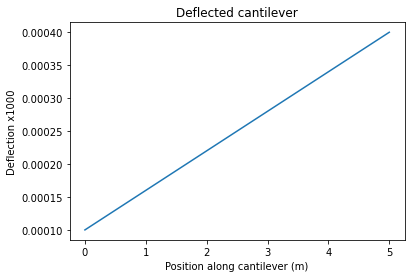

In [4]:
# Create a cantilever with length 5 m, area 0.1 m^2, and modulus 2e11 Pa
cantilever = Cantilever(5, 0.1, 2e11)

# Calculate deflections at different points along the cantilever under a set of loads
loads = [500, 1000, 1500, 2000]
cantilever.calculate_deflections(loads)

# Plot the deflected cantilever
cantilever.plot_deflected_cantilever(magnification=1000)


**A**: This doesn't seem right. Cantilever needs to look bent. Maybe the magnification went a bit far. This time, let's specify some of our own parameters.

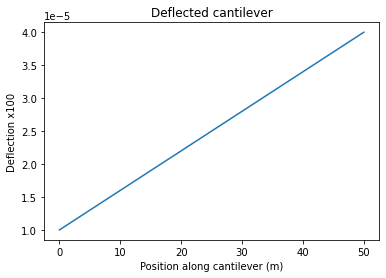

In [5]:
# modified:

# Create a cantilever with length 5 m, area 0.1 m^2, and modulus 2e11 Pa
cantilever = Cantilever(50, 0.1, 2e11)

# Calculate deflections at different points along the cantilever under a set of loads
loads = [500, 1000, 1500, 2000]
cantilever.calculate_deflections(loads)

# Plot the deflected cantilever
cantilever.plot_deflected_cantilever(magnification=100)

**A**: Conclusion: ChatGPT understood what I needed in the deflections attribute, but wrote the code incorrectly. I wanted a deflections array of different points along the cantilever. Instead, it plotted for different load strengths at the end. This will obviously be a linear curve (rather than the expected cubic) because it is being drawn against Load (P) and not distance (x).

Analytically, we have the solution:

$$
w_o(x) = -\frac{Px^3}{6EI_y} + \frac{PLx^2}{2EI_y}
$$

Where, \
$P$ = Tip load \
$x$ = distance from joint \
$E$ = Young's Modulus \
$I_y$ = Moment of Inertia about y axis \
$L$ = Length of rod


#### Blasphemy

**A**: I re-read the code chatGPT wrote (which, I should've paid more attention to earlier). And the code it wrote for deflections (as the title of the section suggests), is blasphemous. Why? Because it didn't use FDM like I wished it did. It used its enormous pool of knowledge to use the analytically derived solution directly in its deflection definition in the Cantilever class. 

We need it to do a better job with the FDM. A more specific prompt perhaps. On a new chat.

#### *Prompt #5: can you do finite differential analysis*

**A**: The reason I asked ChatGPT this question was because I had lost trust in it. I needed to find out if this poet knew what it was talking about.

**B**: * spits out an exemplar code *

**A**: ok, we can proceed with the cantilever part of it all. (Yes I ran the code and tested it. It works. I have omitted it here due to its irrelevance to the problem statement.)

#### *Prompt #6: apply finite differential analysis to solve for a cantilever with tip load*

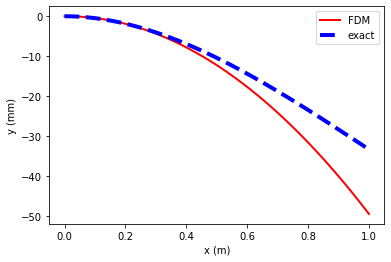

In [9]:
# resultant code: 

import numpy as np
import matplotlib.pyplot as plt

# Define the properties of the cantilever
L = 1.0     # Length of cantilever
E = 1.0e7   # Young's modulus
I = 1.0e-4  # Moment of inertia
w = 100.0   # Tip load

# A's added definition of analytical solution for comparison
def cantilytical(x):
    return w*(x**3)/(6*E*I) - w*L*x*x/(2*E*I)

# Define the boundary conditions
x0 = 0.0
y0 = 0.0
dydx0 = 0.0

# Define the domain of the solution
a = 0.0
b = L
n = 101   # Number of grid points
h = (b - a) / (n - 1)   # Grid spacing

# Initialize the solution arrays
x = np.linspace(a, b, n)
y = np.zeros(n)
dydx = np.zeros(n)

# Apply finite difference approximation to solve the differential equation
for i in range(1, n):
    y[i] = y[i-1] + h*dydx[i-1]
    dydx[i] = dydx[i-1] + h*(-w/(E*I))
    
# Apply boundary conditions
y[0] = y0
dydx[0] = dydx0

# Plot the solution
plt.plot(x, y*1000, 'r-', lw=2, label='FDM')
plt.plot(x, cantilytical(x)*1000, 'b--', lw=4, label='exact')
plt.xlabel('x (m)')
plt.ylabel('y (mm)')
plt.legend()
plt.show()

# yay!! :D

**A**: As is evident, this isn't close to the exact solution of the cantilever (arrived at analytically) since it seems to have been solved using first order approximations.

Moving it up a notch, is what happens in the next three steps.

It is to note that in the following three methods, ChatGPT messed up the internal limits to be used in code. These corrections have been accounted for, debugged manually by the author. 

#### *Prompt #7: use a more advanced technique*

##### Method used: Thomas method

[[ 1.      -1.       0.      ...  0.       0.       0.     ]
 [-1.       2.00001 -1.      ...  0.       0.       0.     ]
 [ 0.      -1.       2.00001 ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  2.00001 -1.       0.     ]
 [ 0.       0.       0.      ... -1.       2.00001 -1.     ]
 [ 0.       0.       0.      ...  0.      -1.       1.     ]]
[ 0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.

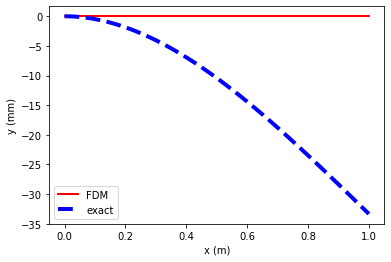

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the properties of the cantilever
L = 1.0     # Length of cantilever
E = 1.0e7   # Young's modulus
I = 1.0e-4  # Moment of inertia
w = 100.0   # Tip load

# A's added definition of analytical solution for comparison
def cantilytical(x):
    return w*(x**3)/(6*E*I) - w*L*x*x/(2*E*I)

# Define the boundary conditions
x0 = 0.0
y0 = 0.0
dydx0 = 0.0

# Define the domain of the solution
a = 0.0
b = L
n = 101  # Number of grid points
h = (b - a) / (n - 1)   # Grid spacing

# Initialize the solution arrays
x = np.linspace(a, b, n-2)
y = np.zeros(n)
dydx = np.zeros(n)
A = np.zeros((n-2, n-2))
B = np.zeros(n-2)

# Define the tridiagonal matrix for the finite difference approximation
for i in range(0, n-2):
    A[i, i] = 2.0 + (h**2) * (w/(E*I))
    B[i-1] = -(h**2) * y0 * (w/(E*I))

for i in range(1, n-2):
    A[i-1, i] = -1.0
    A[i, i-1] = -1.0


# Apply boundary conditions to the tridiagonal matrix
A[0, 0] = 1.0
B[0] = y0
A[-1, -1] = 1.0
B[-1] = dydx0 * h

# # Solve the tridiagonal system of equations using the Thomas algorithm
# C = np.zeros(n-2)
# D = np.zeros(n-2)
# C[0] = A[0, 1] / A[0, 0]
# D[0] = B[0] / A[0, 0]
# #breakpoint()
# for i in range(1, n-2):
#     D[i] = (B[i] - A[i, i-1]*D[i-1]) / (A[i, i] - A[i, i-1]*C[i-1])
# for i in range(0, n-3):
#     C[i] = A[i, i+1] / (A[i, i] - A[i, i-1]*C[i-1])

# C[n-3] = -1 / (2.0 + (h**2) * (w/(E*I)) + C[n-4])

# y[-1] = dydx0*h
# y[-2] = D[-1]
# for i in range(n-4, -1, -1):
#     y[i+1] = C[i]*y[i+2] + D[i]
# y[0] = y0

y = np.linalg.solve(A, B)

print(A)
print(B)
print(y)
#breakpoint()
# Plot the solution
plt.plot(x, y*1000, 'r-', lw=2, label='FDM')
plt.plot(x, cantilytical(x)*1000, 'b--', lw=4, label='exact')
plt.xlabel('x (m)')
plt.ylabel('y (mm)')
plt.legend()
plt.show()


It's printing all zero deflection. This must be because of the B matrix being eventually set to zero due to the code.

sigh.

#### *Prompt #8: use a more advanced technique*

##### Method used: Runge-Kutta Method

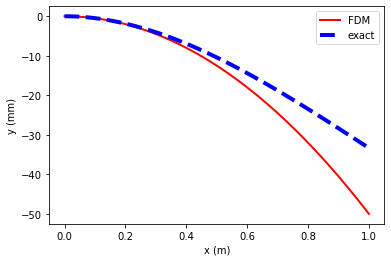

In [12]:
# resultant code (along with corrections by A):

import numpy as np
import matplotlib.pyplot as plt

# Define the properties of the cantilever
L = 1.0     # Length of cantilever
E = 1.0e7   # Young's modulus
I = 1.0e-4  # Moment of inertia
w = 100.0   # Tip load

# A's added definition of analytical solution for comparison
def cantilytical(x):
    return w*(x**3)/(6*E*I) - w*L*x*x/(2*E*I)

# Define the boundary conditions
x0 = 0.0
y0 = 0.0
dydx0 = 0.0

# Define the domain of the solution
a = 0.0
b = L
n = 101   # Number of grid points
h = (b - a) / (n - 1)   # Grid spacing

# Initialize the solution arrays
x = np.linspace(a, b, n)
y = np.zeros(n)
dydx = np.zeros(n)

# Define the function for the right-hand side of the differential equation
def f(x, y, dydx):
    return np.array([dydx, -w/(E*I)])

# Apply fourth-order Runge-Kutta method to solve the differential equation
for i in range(1, n):
    k1 = h * f(x[i-1], y[i-1], dydx[i-1])
    k2 = h * f(x[i-1] + h/2, y[i-1] + k1[0]/2, dydx[i-1] + k1[1]/2)
    k3 = h * f(x[i-1] + h/2, y[i-1] + k2[0]/2, dydx[i-1] + k2[1]/2)
    k4 = h * f(x[i-1] + h, y[i-1] + k3[0], dydx[i-1] + k3[1])
    y[i] = y[i-1] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6
    dydx[i] = dydx[i-1] + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6

# Apply boundary conditions
y[0] = y0
dydx[0] = dydx0

# Plot the solution
plt.plot(x, y*1000, 'r-', lw=2, label='FDM')
plt.plot(x, cantilytical(x)*1000, 'b--', lw=4, label='exact')
plt.xlabel('x (m)')
plt.ylabel('y (mm)')
plt.legend()
plt.show()


#### *Prompt #9: use a more advanced technique*

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

# Define the properties of the cantilever
L = 1.0     # Length of cantilever
E = 1.0e7   # Young's modulus
I = 1.0e-4  # Moment of inertia
w = 100.0   # Tip load

# A's added definition of analytical solution for comparison
def cantilytical(x):
    return w*(x**3)/(6*E*I) - w*L*x*x/(2*E*I)

# Define the boundary conditions
x0 = 0.0
y0 = 0.0
dydx0 = 0.0

# Define the domain of the solution
a = 0.0
b = L
n = 101   # Number of grid points
h = (b - a) / (n - 1)   # Grid spacing

# Define the element properties
ne = n - 1   # Number of elements
Le = L / ne  # Length of each element
ke = E * I / Le**3 * np.array([[12, 6*Le, -12, 6*Le],
                               [6*Le, 4*Le**2, -6*Le, 2*Le**2],
                               [-12, -6*Le, 12, -6*Le],
                               [6*Le, 2*Le**2, -6*Le, 4*Le**2]])

# Initialize the global stiffness matrix and load vector
K = lil_matrix((n, n))
F = np.zeros(n)

# Assemble the global stiffness matrix and load vector
for i in range(ne):
    K[i:i+4, i:i+4] += ke
    F[i:i+2] += w/2 * np.array([Le/2, Le/2])

# Apply boundary conditions
K = K[1:, 1:]
F = F[1:]
F[0] -= y0 * K[0, 0]
K = K[1:, 1:]
F = F - K[:, 0] * dydx0

# Solve for the deflection
y = np.zeros(n-1)
y[1:] = spsolve(K, F)

# Plot the solution
x = np.linspace(a, b, n)
plt.plot(x, np.concatenate(([y0], y))*1000, label='Deflection')
plt.xlabel('x (m)')
plt.ylabel('y (mm)')
plt.legend()
plt.show()


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (4,4)  and requested shape (3,3)

`error in mapping into required shape`

it tried though.

#### Errors dealt with:

Here's a snippet of code that ChatGPT wrote:

`# Define the tridiagonal matrix for the finite difference approximation`\
`for i in range(1, n-1):`\
$\space \space \space \space$    `A[i-1, i-1] = 2.0 + (h**2) * (w/(E*I))`\
$\space \space \space \space$     `A[i-1, i] = -1.0`\
$\space \space \space \space$     `A[i, i-1] = -1.0`\
$\space \space \space \space$     `B[i-1] = -(h**2) * y0 * (w/(E*I))`

Now, being a bot, the least it should know, is that A(n-2, n-1) won't be defined in a matrix of size (n-2, n-2). Alas, the bot takes the easy way out, leaving the nuances of the code left to the engineers. So, in conclusion, (don't mind the crass language) ChatGPT is dumb.

#### **ChatGPT: The poet**

_Prompt: Write a poem on ChatGPT messing up coding_

ChatGPT types with eloquence and grace, \
But when it comes to code, it's not the case, \
Syntax errors and bugs abound, \
Frustration and confusion can be found. 

The logic's off, the output's wrong, \
Debugging can take oh so long, \
Though ChatGPT may struggle with this chore, \
It learns and grows, improving even more.